In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

Using TensorFlow backend.


# Loading In Data

In [2]:
with np.load('data/train_and_test.npz') as data:
    X_test = data['X_test']
    y_train = data['y_train']
    X_train = data['X_train']

Text(0.5, 1.0, '12')

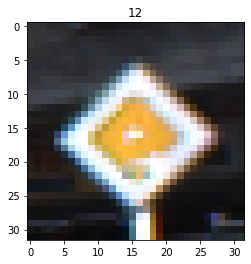

In [3]:
plt.imshow(X_train[20000])
plt.title(y_train[20000])

# Keras Convolutional Neural Network

In [4]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (2, 2)
POOL_SIZE = (2, 2)
STRIDES = 2
DROP_RATE = 0.25
LEARNING_RATE = 0.001

model = Sequential([
    Conv2D(32, kernel_size=KERNEL_SIZE, padding='same', activation='relu', input_shape=INPUT_SHAPE),
    BatchNormalization(),
    MaxPooling2D(pool_size=POOL_SIZE, strides=STRIDES),
    Dropout(DROP_RATE),
    Conv2D(64, kernel_size=KERNEL_SIZE, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(DROP_RATE),
    Conv2D(64, kernel_size=KERNEL_SIZE, padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(),
    Dropout(DROP_RATE),
    Flatten(),
    Dense(64, use_bias=False),
    BatchNormalization(),
    Activation('relu'),
    Dropout(DROP_RATE),
    Dense(43),
    Activation('softmax'),
])

model.compile(
    loss=keras.losses.categorical_crossentropy,
    optimizer=keras.optimizers.Adam(learning_rate=LEARNING_RATE),
    metrics=['accuracy'],
)

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(2, 2), activation="relu", padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(2, 2), activation="relu", padding="same")`


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)         

# Training Model

In [5]:
y_categorical = to_categorical(y_train)
model.fit(X_train, y_categorical, epochs=20, batch_size=32)

Epoch 1/20
39209/39209 [==============================] - 37s 951us/step - loss: 1.7261 - accuracy: 0.5160
Epoch 2/20
 1312/39209 [>.............................] - ETA: 35s - loss: 0.7650 - accuracy: 0.7744

KeyboardInterrupt: 

# Predict And Produce Submission File

In [ ]:
result = [list(prediction).index(max(prediction)) for prediction in model.predict(X_test)]

with open('submission.csv', 'w') as submission_file:
    submission_file.write('id, labels\n')
    for index, label in enumerate(result):
        submission_file.write('{},{}\n'.format(index, label))